# Appliances with multiple cycles


An example of an appliance with multiple cycle is a fridge. Fridges
usually have different duty cycles, which can be estimated based on seasonal
temperature trends and/or frequency of user interaction (e.g., how often the 
door gets opened).

In this example a fridge with 3 different duty cycles is modelled. The
time windows are defined for 3 different cycles across 3 different season
types:


| season type |               Standard cycle              |  Intermediate cycle |   Intensive cycle   |
|-------------|:-----------------------------------------:|:-------------------:|:-------------------:|
| Hot         | 00:00:00 - 04:59:00 & 20:01:00 - 23:59:00 | 05:00:00 - 07:59:00 | 08:00:00 - 20:00:00 |
| Warm        | 00:00:00 - 04:59:00 & 18:01:00 - 23:59:00 | 05:00:00 - 09:39:00 | 09:40:00 - 18:00:00 |
| Cold        | 00:00:00 - 04:59:00 & 20:01:00 - 23:59:00 | 05:00:00 - 20:00:00 |          -          |

### Creating the user and appliance

In [1]:
# importing functions
from ramp import User, UseCase, get_day_type
import pandas as pd

In [2]:
# creating user
household = User()

In [3]:
# creating the appliance
fridge = household.Appliance(
    name="Fridge",
    number=1,
    power=200,
    num_windows=1,
    func_time=1400,
    time_fraction_random_variability=0,
    func_cycle=30,
    fixed="yes",
    fixed_cycle=3,  # number of cycles
)

In [4]:
# setting the functioning windows
fridge.windows([0, 1440])  # always on during the whole year

### Assigining the specific cycles

In [5]:
# assiging the specific cycles
# first cycle: standard cycle
fridge.specific_cycle_1(
    p_11=200,
    t_11=20,
    p_12=5,
    t_12=10,
)

# second cycle: intermediate cycle
fridge.specific_cycle_2(
    p_21=200,
    t_21=15,
    p_22=5,
    t_22=15,
)

# third cycle: intensive cycle
fridge.specific_cycle_3(
    p_31=200,
    t_31=10,
    p_32=5,
    t_32=20,
)

After defining the cycle power and duration parameters, the time windows of year at which the cycles happens should be specifid by:

In [6]:
# defining cycle behaviour
fridge.cycle_behaviour(
    cw11=[480, 1200], cw21=[300, 479], cw31=[0, 229], cw32=[1201, 1440]
)

### Buidling the profiles

In [6]:
use_case = UseCase(users=[household])
peak_time_range = use_case.calc_peak_time_range()

In [8]:
# days to build the profiles
days = [
    "2020-05-16",
    "2020-08-16",
    "2020-12-16",
]

profiles = pd.DataFrame(index=range(0, 1440), columns=days)

for day_idx, day in enumerate(days):
    profile = household.generate_single_load_profile(
        prof_i=day_idx,  # the day to generate the profile
        peak_time_range=peak_time_range,
        day_type=get_day_type(day),
    )

    profiles[day] = profile

In [9]:
print(profiles)

      2020-05-16  2020-08-16  2020-12-16
0          0.001       5.000       0.001
1          0.001       5.000       0.001
2          0.001       5.000       0.001
3          5.000       5.000       0.001
4          5.000       5.000       0.001
...          ...         ...         ...
1435       0.001       0.001       0.001
1436       0.001       0.001       0.001
1437       0.001       0.001       0.001
1438       0.001       0.001       0.001
1439       0.001       0.001       0.001

[1440 rows x 3 columns]


<AxesSubplot:>

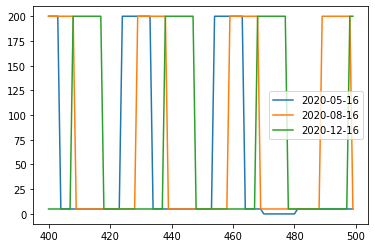

In [10]:
# plotting a part of the days
profiles.iloc[400:500].plot()